# Machine Learning

<img src="https://static1.squarespace.com/static/5150aec6e4b0e340ec52710a/t/51525c33e4b0b3e0d10f77ab/1364352052403/Data_Science_VD.png?format=250w">

http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram


## What is Machine Learning?

> Field of study that give computers the ability to learn without being explicitly programmed.
> -Arthur Samuel, 1959

<b>Short  Answer</b>:  The offspring of Statistics and Computer Science

<b>Better Answer</b>:  A set of models which aim to learn something about a data set to apply that knowledge to new data

<u>Utility</u>

 - Using labels from training data to classify new objects (e.g., images, digits, webpages)
 - Learning the relationship between explanatory features and response variable to predict for new data (e.g., stock market)
 - Discovering natural clustering structure in data
 - Detecting low-dimensional structure in high-dimensional data
 - Finding outliers in large data sets
 - Game playing/Robotics
 
 >   *Essentially, all models are wrong, but some are useful.*
 
 >     -- George Box, Statistician (1919-2013)


## Navigating the Terminology 

<img src="figs/term.png">

## Different Types of Learning

<img src="figs/three.png">

From: [S. Raschka (2015)](https://www.slideshare.net/SebastianRaschka/nextgen-talk-022015/8-Learning_Labeled_data_Direct_feedback)

## Supervised vs. Unsupervised Learning 

<img src="figs/learn_types.png">

## Supervised Learning: Regression

Use training set of $(\vec x,y)$ pairs to learn to predict $y$ for new $\vec x$. **Regression** is predicting a *continuous* outcome ($y$) variable from a vector of input features ($\vec x$). That is, we seek to learn:

$f(\vec x) = y$

 In "theory-driven" MCMC modeling, we already think we know from physics what the functional form of $f$ is and what we try to do is figure out the parameters of $f$ that best accommodate the data we have and the beliefs we start with. When we do not know a functional form for $f$ we take more "data driven" approach, such as with Gaussian Processes.

In `sklearn` there are a lot of "data driven" modelling possibilities.

- Linear Regression:  `linear_model.LinearRegression`
- Lasso & Ridge Reg.:  `linear_model.Lasso` / `linear_model.Ridge`
- Gaussian Process Regression: `gaussian_process.GaussianProcess`
- Nearest Neighbor Regression:  `neighbors.KNeighborsRegressor`
- Support Vector Regression:   `svm.SVR`
- Regression Trees:  `tree.DecisionTreeRegressor`

An aside on the "data driven" vs "theory driven" distinction...

### Regression ## 

Let's take a look at the famous California Housing data. We don't have a good physics model for this (of course there are economic theories...). for now we just have data and seek a data-driven model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

import seaborn as sns
sns.set_context("talk")

from sklearn import datasets
import pandas as pd

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

X = housing['data']  # 8 features (e.g. HouseAge,Latitude, AveBedrms, etc.)
Y = housing['target']  # response (median house price in $100,000)

df = pd.DataFrame(X, columns=housing.feature_names)
df["target"]  = housing['target']

# separate out the target into 5 different bins (for viz purposes)
nbins = 5
df["target_binned"] = pd.qcut(df["target"], nbins, labels=False)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,target_binned
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,4
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,4
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,4
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0


In [3]:
print("feature vector shape=", X.shape)
print("output shape=", Y.shape)

feature vector shape= (20640, 8)
output shape= (20640,)


In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

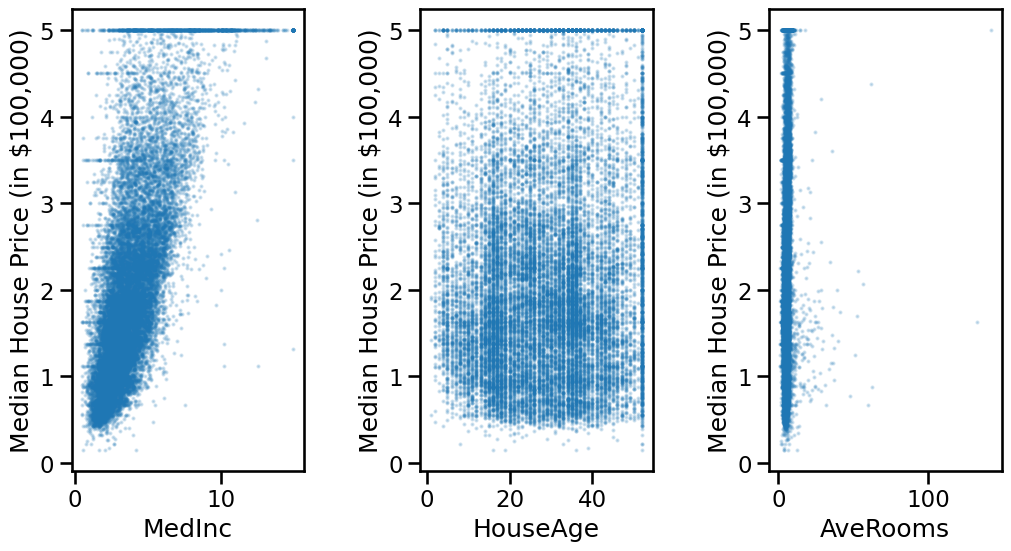

In [6]:
f, axs = plt.subplots(1, 3, figsize=(12,6))

for i, ax in enumerate(axs):
    ax.scatter(X[:, i], Y, alpha=0.2, s=2)
    ax.set_xlabel(housing.feature_names[i])
    ax.set_ylabel("Median House Price (in $100,000)")
    
plt.subplots_adjust(wspace=0.5)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 500x500 with 0 Axes>

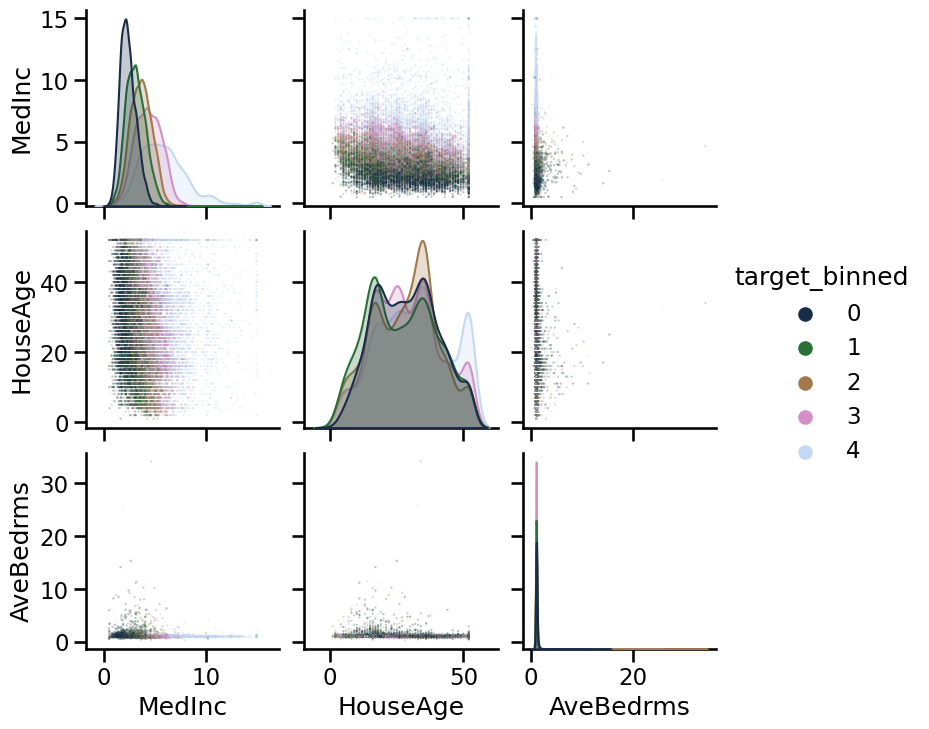

In [7]:
fig = plt.figure(figsize=(5, 5))
point_size = 80*(Y/max(Y))**3

df1 = df[['MedInc', 'HouseAge', 'AveBedrms', "target_binned"]]
colors = sns.color_palette("colorblind", nbins)

g= sns.pairplot(df1, hue="target_binned", palette=sns.color_palette("cubehelix", nbins),
                         plot_kws=dict(s=2, edgecolor=None, alpha=0.3))

### Basic Model Fitting

We need to create a **training set** and a **testing set**.

In [8]:
# half of data
import math
half = math.floor(len(Y)/2)
train_X = X[:half]
train_Y = Y[:half]
test_X = X[half:]
test_Y = Y[half:]

## Linear Regression

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables. In mathematical notion, if $\hat{y}$ is the predicted value.
$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$
Across the module, we designate the vector $w = (w_1,
..., w_p)$ as `coef_` and $w_0$ as `intercept_`.
To perform classification with generalized linear models, see Logistic regression.

http://scikit-learn.org/stable/modules/linear_model.html

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

clf = linear_model.LinearRegression()

In [10]:
# fit the model
clf.fit(train_X, train_Y)

LinearRegression()

In [11]:
clf.intercept_

-28.87181804541252

In [12]:
# now do the prediction
Y_lr_pred = clf.predict(test_X)

# how well did we do?
mse = mean_squared_error(test_Y,Y_lr_pred) ; print(mse)

0.5482126919150978


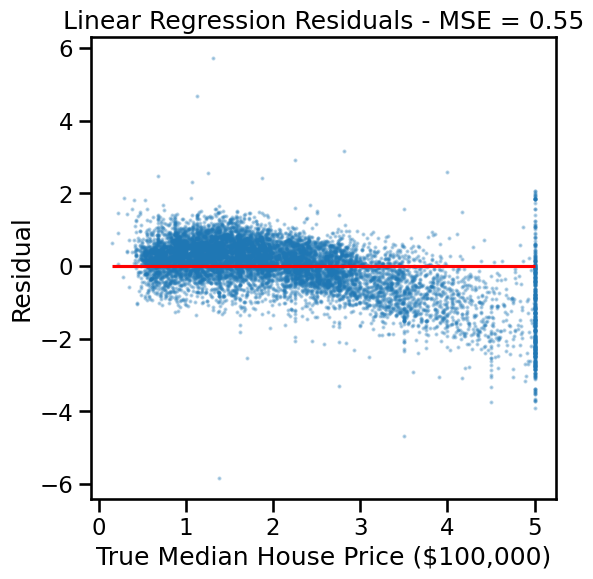

In [13]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(test_Y,Y_lr_pred - test_Y, s=2, alpha=0.3)
ax.set_title("Linear Regression Residuals - MSE = %.2f" % mse)
ax.set_xlabel("True Median House Price ($100,000)")
ax.set_ylabel("Residual")
ax.hlines(0,min(test_Y),max(test_Y),color="red")